<h1>Author: <b>Thanh HoangVan</b></h1>
<h2>School of Applied Mathematics and Informatics</h2>

Email: thanh.hoangvan051199@gmail.com - thanh.hv173586@sis.hust.edu.vn

# Import Libray

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from numpy import random

# Read data from file

In [33]:
path1 = 'accidents_2005_to_2007.csv'
path2 = 'accidents_2009_to_2011.csv'
path3 =  'accidents_2012_to_2014.csv'
#path4 = 'ukTrafficAADF.csv'

data1 = pd.read_csv(path1, low_memory=False)
data2 = pd.read_csv(path2, low_memory=False)
data3 = pd.read_csv(path3, low_memory=False)

data = pd.concat([data1, data2, data3])

del data1, data2, data3

# Feature Engineering

## Drop Columns

In [34]:
data.drop(['Accident_Index', 'Junction_Detail', 'Junction_Control', 'Location_Easting_OSGR', 'Location_Northing_OSGR', \
'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location', \
'Local_Authority_(Highway)', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', \
'Road_Surface_Conditions', 'Road_Type'], axis=1, inplace=True)

## Date column

In [35]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.insert(6, 'Month', data['Date'].dt.month)
data.insert(6, 'Day_of_Year', data['Date'].dt.dayofyear)

data.drop(['Date'], axis=True, inplace=True)

## Time column

In [36]:
data['Time'] = data['Time'].astype('str').str.split(':')
data.insert(8, 'Hour', data['Time'].str[0])
#data.insert(9, 'Minute', data['Time'].str[1])

data.drop(['Time'], axis=1, inplace=True)

In [37]:
data['Hour'] = pd.to_numeric(data['Hour'], errors='coerce')
#data['Minute'] = pd.to_numeric(data['Minute'], errors='coerce')

## Weather column

In [38]:
T = data['Weather_Conditions'].astype('str').str.split(' ')

data.insert(6, "Weather_Fine" ,T.str[0])
data.insert(7, "Weather_Raining" ,T.str[0])
data.insert(8, "Weather_Fog" ,T.str[0])
data.insert(9, "Weather_Other" ,T.str[0])
#data.insert(10, "Weather_High_Winds" ,T.str[1])

data['Weather_Fine'].replace('Fine', 1, inplace=True)
data['Weather_Fine'].replace(['Raining', 'Snowing', 'Other', 'Fog'], 0, inplace=True)
data['Weather_Fine'].replace(['Unknown', 'nan'], np.nan, inplace=True)

data['Weather_Raining'].replace('Raining', 1, inplace=True)
data['Weather_Raining'].replace(['Fine', 'Snowing', 'Other', 'Fog'], 0, inplace=True)
data['Weather_Raining'].replace(['Unknown', 'nan'], np.nan, inplace=True)

data['Weather_Fog'].replace('Fog', 1, inplace=True)
data['Weather_Fog'].replace(['Fine', 'Snowing', 'Other', 'Raining'], 0, inplace=True)
data['Weather_Fog'].replace(['Unknown', 'nan'], np.nan, inplace=True)

data['Weather_Other'].replace('Other', 1, inplace=True)
data['Weather_Other'].replace(['Fine', 'Snowing', 'Fog', 'Raining'], 0, inplace=True)
data['Weather_Other'].replace(['Unknown', 'nan'], np.nan, inplace=True)

#data['Weather_High_Winds'].replace('with', 1, inplace=True)
#data['Weather_High_Winds'].replace('without', 0, inplace=True)
#data['Weather_High_Winds'].replace(['nan', 'or'], np.nan, inplace=True)

data.drop(['Weather_Conditions'], axis=1, inplace=True)

# Visualization data

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Longitude                   1504049 non-null  float64
 1   Latitude                    1504049 non-null  float64
 2   Police_Force                1504150 non-null  int64  
 3   Accident_Severity           1504150 non-null  int64  
 4   Number_of_Vehicles          1504150 non-null  int64  
 5   Number_of_Casualties        1504150 non-null  int64  
 6   Weather_Fine                1475728 non-null  float64
 7   Weather_Raining             1475728 non-null  float64
 8   Weather_Fog                 1475728 non-null  float64
 9   Weather_Other               1475728 non-null  float64
 10  Day_of_Year                 1504150 non-null  int64  
 11  Month                       1504150 non-null  int64  
 12  Hour                        1504033 non-null  float64
 13

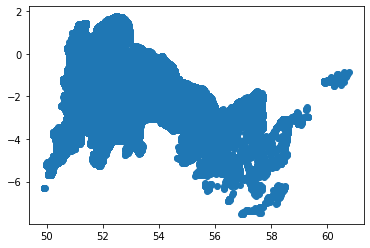

In [41]:
X = data['Latitude'].values
Y = data['Longitude'].values

plt.scatter(X,Y)
plt.show()

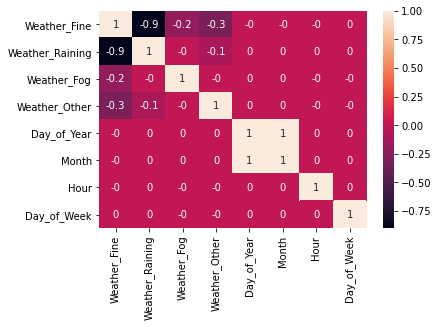

In [42]:
corr = data[['Weather_Fine','Weather_Raining', 'Weather_Fog', 'Weather_Other', 'Day_of_Year', 'Month', 'Hour', 'Day_of_Week']].corr().round(1)
sns.heatmap(corr, annot=True)

# Algorithms

In [43]:
data = data.loc[:,['Longitude', 'Latitude', 'Weather_Fine','Weather_Raining', 'Weather_Fog', 'Weather_Other',\
'Day_of_Year', 'Month', 'Hour', 'Day_of_Week', 'Year']]
data.dropna(inplace=True)

## Clustering data by KMeans

In [44]:
# Number of Cluster
K = 40

model = KMeans(n_clusters = K)
model.fit(data[['Latitude', 'Longitude']])
data.insert(0, 'Cluster', model.labels_)

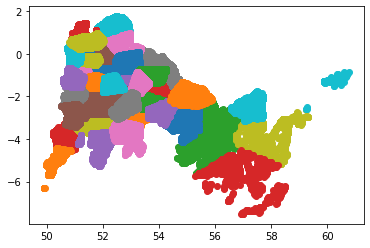

In [45]:
for i in range(K):
    T = data[data['Cluster'] == i]
    plt.scatter(T['Latitude'], T['Longitude'])
plt.show()

In [46]:
data.insert(1, 'Accident', 1)

In [47]:
data.reset_index(drop=True, inplace=True)

In [48]:
data.to_csv('data_processed.csv', index=False)

In [63]:
Cluster = pd.DataFrame()

In [64]:
Lat = model.cluster_centers_[:, 0]
Lng = model.cluster_centers_[:, 1]
Cluster.insert(0, 'Cluster', np.arange(K))
Cluster.insert(1, 'Lat', Lat)
Cluster.insert(2, 'Lng', Lng)

In [67]:
Cluster.head()
Cluster.to_csv("Cluster.csv", index=False)